<a href="https://colab.research.google.com/github/aletbm/Hazardous_Asteroids_Predictions--CoderHouse/blob/main/Visualizacion__RiosAlexanderDaniel_CoderHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.style.use('dark_background')

# ☄️ NASA JPL Asteroid Dataset

<img src="https://media.ambito.com/p/da6a05c9b05cb3047a4a7f5451d7a098/adjuntos/239/imagenes/040/635/0040635192/asteroidesjpg.jpg">

## 📣 Acerca del dataset

Este dataset fue elaborado por el Investigador en Astronomia y Astrofisica Mir Sakhawat Hossain, este dataset es mantenido oficialmente por el Laboratorio de Propulsion a Chorro (JPL por sus siglas en ingles) del Instituto Tecnologico de California la cual es una organizacion que se encuentra bajo la supervision de la NASA. Este dataset contiene varios tipos de datos relacionados con asteroides.

Este dataset puede ser utilizado en proyectos de Machine Learning para tareas tanto de clasificacion como de regresion.

### Definicion de columnas:

+ **id**: ID interno
+ **spkid**: ID principal
+ **fullname**: Designacion/Nombre completo del objeto
+ **pdes**: Designación primaria de objeto
+ **name**: Nombre del objeto en la Union astronomica Internacional
+ **prefix**: Prefijo del cometa
+ **neo**: Objeto cercano a la tierra (Near-Earth Object) (Y/N)
+ **pha**: Asteroide potencialmente peligroso (Potencial Hazardous Asteroid) (Y/N)
+ **H**: Parámetro de magnitud absoluta
+ **diameter**: Diametro del objeto (equivalente a una esfera) (km)
+ **albedo**: Albedo geométrico
+ **diameter_sigma**: Incertidumbre 1-sigma en el diámetro del objeto (km)
+ **orbit_id**: ID de solución de órbita
+ **epoch**: Época de osculación en forma de día juliano (TBD)
+ **epoch_mjd**: Época de osculación en forma de día juliana modificada (TBD)
+ **epoch_cal**: Época de osculación en forma de fecha/hora del calendario (TBD)
+ **equinox**: Equinoccio de marco de referencia
+ **e**: Excentricidad
+ **a**: Semieje mayor (au)
+ **q**: Distancia del perihelio (au)
+ **i**: Inclinación. Angulo con respecto al plano eclíptico x-y (deg)
+ **om**: Longitud del nodo ascendente (deg)
+ **w**: Argumento del perihelio (deg)
+ **ma**: Anomalía media (deg)
+ **ad**: Distancia afelio (au)
+ **n**: Noción media (deg/d)
+ **tp**: Tiempo de paso del perihelio (TBD)
+ **tp_cal**: Tiempo de paso del perihelio en forma de fecha/hora del calendario (TBD)
+ **per**: Período orbital sideral (d)
+ **per_y**: Período orbital sideral (years)
+ **moid**: Distancia de intersección de la órbita mínima de la Tierra (au)
+ **moid_ld**: Distancia de intersección de la órbita mínima de la Tierra (LD)
+ **sigma_e**: Excentricidad (incertidumbre 1-sigma)
+ **sigma_a**: Semieje mayor (incertidumbre 1-sigma) (au)
+ **sigma_q**: Distancia del perihelio (incertidumbre 1-sigma) (au)
+ **sigma_i**: Inclinación. Angulo con respecto al plano eclíptico x-y (incertidumbre 1-sigma) (deg)
+ **sigma_om**: Longitud del nodo ascendente (incertidumbre 1-sigma) (deg)
+ **sigma_w**: Argumento del perihelio (incertidumbre 1-sigma) (deg)
+ **sigma_ma**: Anomalía media (incertidumbre 1-sigma) (deg)
+ **sigma_ad**: Distancia afelio (incertidumbre 1-sigma) (au)
+ **sigma_n**: Noción media (incertidumbre 1-sigma) (deg/d)
+ **sigma_tp**: Tiempo de paso del perihelio (incertidumbre 1-sigma) (TBD)
+ **sigma_per**: Período orbital sideral (incertidumbre 1-sigma) (d)
+ **class**: Clasificación de órbita
+ **rms**: RMS de ajuste de órbita normalizado (arcsec)

## 👁️ Echando un vistazo al dataset

In [2]:
df_asteroids = pd.read_csv("/content/drive/MyDrive/Coder/Data Science/asteroid_dataset.csv", engine='c', low_memory=False, index_col="id")
df_asteroids.head()

,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
id,,,,,,,,,,,,,,,,,,,,,
a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [5]:
df_asteroids.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958524 entries, a0000001 to bT3S2678
Data columns (total 44 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   spkid           958524 non-null  int64  
 1   full_name       958524 non-null  object 
 2   pdes            958524 non-null  object 
 3   name            22064 non-null   object 
 4   prefix          18 non-null      object 
 5   neo             958520 non-null  object 
 6   pha             938603 non-null  object 
 7   H               952261 non-null  float64
 8   diameter        136209 non-null  float64
 9   albedo          135103 non-null  float64
 10  diameter_sigma  136081 non-null  float64
 11  orbit_id        958524 non-null  object 
 12  epoch           958524 non-null  float64
 13  epoch_mjd       958524 non-null  int64  
 14  epoch_cal       958524 non-null  float64
 15  equinox         958524 non-null  object 
 16  e               958524 non-null  float64
 17  a     

In [7]:
df_asteroids.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
spkid,958524.0,3.810114e+06,6.831541e+06,2.000001e+06,2.239632e+06,2.479262e+06,3.752518e+06,5.401723e+07
H,952261.0,1.690641e+01,1.790405e+00,-1.100000e+00,1.610000e+01,1.690000e+01,1.771400e+01,3.320000e+01
diameter,136209.0,5.506429e+00,9.425164e+00,2.500000e-03,2.780000e+00,3.972000e+00,5.765000e+00,9.394000e+02
albedo,135103.0,1.306272e-01,1.103228e-01,1.000000e-03,5.300000e-02,7.900000e-02,1.900000e-01,1.000000e+00
diameter_sigma,136081.0,4.791844e-01,7.828952e-01,5.000000e-04,1.800000e-01,3.320000e-01,6.200000e-01,1.400000e+02
epoch,958524.0,2.458869e+06,7.016716e+02,2.425052e+06,2.459000e+06,2.459000e+06,2.459000e+06,2.459000e+06
epoch_mjd,958524.0,5.886878e+04,7.016716e+02,2.505100e+04,5.900000e+04,5.900000e+04,5.900000e+04,5.900000e+04
epoch_cal,958524.0,2.019693e+07,1.930354e+04,1.927062e+07,2.020053e+07,2.020053e+07,2.020053e+07,2.020053e+07
e,958524.0,1.561163e-01,9.264264e-02,0.000000e+00,9.219296e-02,1.450017e-01,2.006503e-01,1.855356e+00
a,958524.0,2.902143e+00,3.971950e+01,-1.470245e+04,2.387835e+00,2.646969e+00,3.001932e+00,3.348890e+04


# Busqueda de datos nulos

In [20]:
cantidad = df_asteroids.isna().sum()
cantidad = cantidad[cantidad.values > 0]
porcentaje = cantidad * 100 / df_asteroids.shape[0]
df_nulls = pd.DataFrame(data={"Cantidad de valore nulos":cantidad, "Porcentaje de valores nulos":porcentaje}, index=cantidad.index).sort_values(by=["Porcentaje de valores nulos"], ascending=False)
df_nulls

,Cantidad de valore nulos,Porcentaje de valores nulos
prefix,958506,99.998122
name,936460,97.698128
albedo,823421,85.905100
diameter_sigma,822443,85.803068
diameter,822315,85.789714
sigma_per,19926,2.078821
sigma_ad,19926,2.078821
sigma_i,19922,2.078404
sigma_q,19922,2.078404
sigma_a,19922,2.078404


Nuestro `target` es `pha` y como podemos ver tiene valores nulos afortunadamente solo representan el 2.07% del total de datos. Sin valores de `target` esos registros no nos son utiles para la prediccion.
Veamos como lucen:



In [29]:
df_asteroids[df_asteroids["pha"].isna()]

,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
id,,,,,,,,,,,,,,,,,,,,,
bJ39R00R,3246903,(1939 RR),1939 RR,NaN,NaN,N,NaN,12.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MBA,NaN
bJ90O05K,3803913,(1990 OK5),1990 OK5,NaN,NaN,N,NaN,16.40,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MBA,0.29
bJ91R28N,3884244,(1991 RN28),1991 RN28,NaN,NaN,N,NaN,19.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MBA,0.22
bJ93T11C,3884246,(1993 TC11),1993 TC11,NaN,NaN,N,NaN,19.30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MBA,0.18
bJ94A09F,3884247,(1994 AF9),1994 AF9,NaN,NaN,N,NaN,18.50,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MBA,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bK20K03Q,54017210,(2020 KQ3),2020 KQ3,NaN,NaN,N,NaN,19.90,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MCA,0.30
bK20K03R,54017211,(2020 KR3),2020 KR3,NaN,NaN,N,NaN,19.40,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IMB,0.31
bK20K03V,54017212,(2020 KV3),2020 KV3,NaN,NaN,N,NaN,19.91,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IMB,0.40


Aparentemente estos registros contienen muchos otras columnas con datos nulos, por lo que sera beneficioso prescindir de estos registros.

In [34]:
df_asteroids = df_asteroids[~df_asteroids["pha"].isna()]
cantidad = df_asteroids.isna().sum()
cantidad = cantidad[cantidad.values > 0]
porcentaje = cantidad * 100 / df_asteroids.shape[0]
df_nulls = pd.DataFrame(data={"Cantidad de valore nulos":cantidad, "Porcentaje de valores nulos":porcentaje}, index=cantidad.index).sort_values(by=["Porcentaje de valores nulos"], ascending=False)
df_nulls

,Cantidad de valore nulos,Porcentaje de valores nulos
prefix,938585,99.998082
name,916539,97.649272
albedo,803500,85.605948
diameter_sigma,802522,85.501751
diameter,802394,85.488114
H,6262,0.667162
sigma_per,5,0.000533
sigma_ad,5,0.000533
neo,4,0.000426
ad,4,0.000426


Como vemos los porcentajes de valores nulos de muchos `features` se redujo considerablemente. Voy a considerar que las `features` que tiene un porcentaje de valores nulos mayor al 3% pueden ser descartados.

In [38]:
columns_nan = df_nulls[df_nulls["Porcentaje de valores nulos"] > 3].index
df_nulls[df_nulls["Porcentaje de valores nulos"] > 3]

,Cantidad de valore nulos,Porcentaje de valores nulos
prefix,938585,99.998082
name,916539,97.649272
albedo,803500,85.605948
diameter_sigma,802522,85.501751
diameter,802394,85.488114


Estas caracteristicas seran descartadas por su abundante cantidad de valres nulos.

In [39]:
df_asteroids.drop(columns_nan, axis=1, inplace=True)
df_asteroids

In [40]:
df_asteroids

,spkid,full_name,pdes,neo,pha,H,orbit_id,epoch,epoch_mjd,epoch_cal,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
id,,,,,,,,,,,,,,,,,,,,,
a0000001,2000001,1 Ceres,1,N,N,3.400,JPL 47,2458600.5,58600,20190427.0,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
a0000002,2000002,2 Pallas,2,N,N,4.200,JPL 37,2459000.5,59000,20200531.0,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
a0000003,2000003,3 Juno,3,N,N,5.330,JPL 112,2459000.5,59000,20200531.0,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
a0000004,2000004,4 Vesta,4,N,N,3.000,JPL 35,2458600.5,58600,20190427.0,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
a0000005,2000005,5 Astraea,5,N,N,6.900,JPL 114,2459000.5,59000,20200531.0,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bPLS6013,3246801,(6013 P-L),6013 P-L,N,N,17.135,JPL 5,2437203.5,37203,19600926.0,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
bPLS6331,3246834,(6331 P-L),6331 P-L,N,N,18.500,8,2459000.5,59000,20200531.0,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
bPLS6344,3013075,(6344 P-L),6344 P-L,Y,Y,20.400,17,2459000.5,59000,20200531.0,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556


Una vez descartadas las `features` con mayor cantidad de datos nulos procedamos a explorar el dataset.

# Visualizacion de datos
## Balance de datos
### Por `PHA`

<ipython-input-87-a1dd5dc71c5f>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('Paired')


([<matplotlib.patches.Wedge at 0x7b19867bf2e0>,
 [Text(-1.099973699984314, 0.0076065329039175095, 'No Peligrosos'),
  Text(1.6999593546587917, -0.011755530956299096, 'Peligrosos')],
 [Text(-0.5999856545368984, 0.004149017947591368, '99.78%'),
  Text(1.1999713091709117, -0.008298021851505244, '0.22%')])

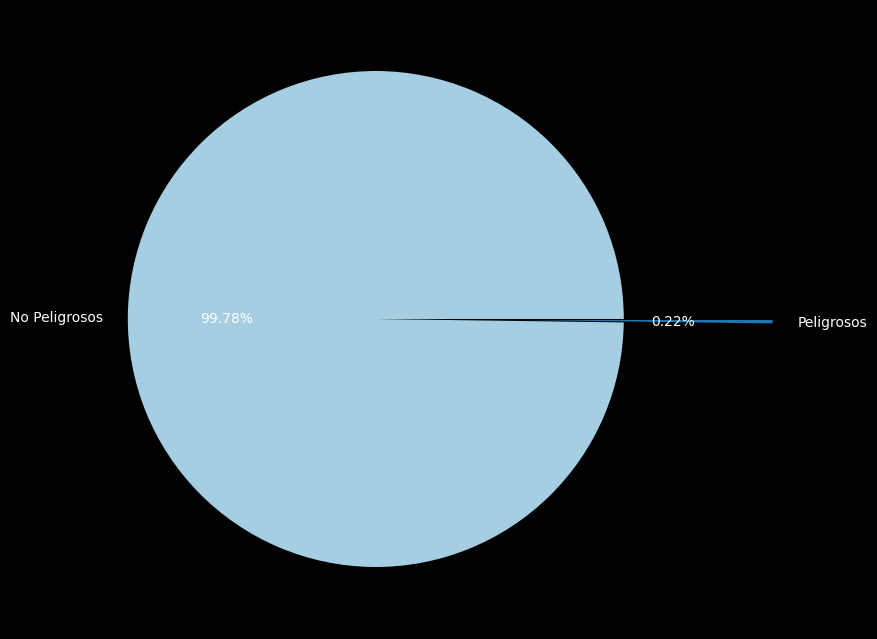

In [87]:
cmap = mpl.cm.get_cmap('Paired')
plt.figure(figsize=(8,20))
plt.pie(df_asteroids["pha"].value_counts(), labels=["No Peligrosos", "Peligrosos"], autopct='%1.2f%%',explode=(0, 0.6), colors=[cmap(0), cmap(1)])